# 03_03_astropy.ipynb - Units, constants, timescales and more with Astropy

In [1]:
import math
import datetime

In [2]:
import numpy as np
import matplotlib.pyplot as pp

import astropy
import astropy.units as au
import astropy.constants as ac
import astropy.time as at
import astropy.coordinates as ao

In [3]:
distance = 100 * au.m

In [4]:
type(distance)

astropy.units.quantity.Quantity

In [5]:
distance

<Quantity 100. m>

In [6]:
distance.value, distance.unit

(100.0, Unit("m"))

In [7]:
speed = distance / (9.58 * au.s)

In [8]:
speed

<Quantity 10.43841336 m / s>

In [9]:
speed.to('km/h')

<Quantity 37.5782881 km / h>

In [10]:
speed.si

<Quantity 10.43841336 m / s>

In [11]:
speed.cgs

<Quantity 1043.84133612 cm / s>

In [12]:
np.linspace(0, 100, 11)  * au.km

<Quantity [  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.,
           100.] km>

In [13]:
ac.c

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

In [14]:
print(ac.c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018


In [15]:
ac.c.name, ac.c.uncertainty, ac.c.reference

('Speed of light in vacuum', 0.0, 'CODATA 2018')

In [16]:
np.sqrt(ac.hbar * ac.G / ac.c**3)

<Quantity 1.61625502e-35 J(1/2) s / kg(1/2)>

In [17]:
_.si

<Quantity 1.61625502e-35 m>

In [18]:
at.Time('2001-01-01T12:30:00')

<Time object: scale='utc' format='isot' value=2001-01-01T12:30:00.000>

In [19]:
at.Time(datetime.datetime(year=2001, month=1, day=1, hour=12, minute=30))

<Time object: scale='utc' format='datetime' value=2001-01-01 12:30:00>

In [20]:
at.Time(51910.52, format='mjd').format

'mjd'

In [21]:
at.Time(662387341, format='gps')

<Time object: scale='tai' format='gps' value=662387341.0>

In [22]:
at.Time(51910.52, format='mjd').iso

'2001-01-01 12:28:48.000'

In [23]:
at.Time(at.Time(51910.52, format='mjd'), format='iso')

<Time object: scale='utc' format='iso' value=2001-01-01 12:28:48.000>

In [24]:
t0 = at.Time('2021-07-01T00:00:00', scale='utc')

In [25]:
t0.tai

<Time object: scale='tai' format='isot' value=2021-07-01T00:00:37.000>

In [26]:
t0.ut1

<Time object: scale='ut1' format='isot' value=2021-06-30T23:59:59.833>

In [27]:
ao.get_body('jupiter', t0)

<SkyCoord (GCRS: obstime=2021-07-01T00:00:00.000, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    (334.09724485, -11.80485887, 4.35618272)>

In [28]:
ao.get_body_barycentric('jupiter', t0)

<CartesianRepresentation (x, y, z) in AU
    (3.98876147, -2.7794672, -1.28843931)>

In [29]:
ao.get_body_barycentric_posvel('jupiter', t0)

(<CartesianRepresentation (x, y, z) in AU
     (3.98876147, -2.7794672, -1.28843931)>,
 <CartesianRepresentation (x, y, z) in AU / d
     (0.0045012, 0.00586849, 0.00240598)>)

In [30]:
ts = at.Time(np.linspace(at.Time('2021-07-01').mjd, at.Time('2031-07-01').mjd, 100),
             format='mjd')

/Users/mvallisneri/opt/anaconda3/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [31]:
jposvel = ao.get_body_barycentric_posvel('jupiter', ts)

/Users/mvallisneri/opt/anaconda3/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 55 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/mvallisneri/opt/anaconda3/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 55 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [32]:
jposvel[0]

<CartesianRepresentation (x, y, z) in AU
    [( 3.98876147, -2.7794672 , -1.28843931),
     ( 4.14848841, -2.55871375, -1.19770036),
     ( 4.29505389, -2.32985076, -1.1031651 ),
     ( 4.4279155 , -2.09356074, -1.005113  ),
     ( 4.54657243, -1.85055814, -0.90383811),
     ( 4.65056741, -1.60158967, -0.79964936),
     ( 4.73949076, -1.34743191, -0.69286961),
     ( 4.81298355, -1.08888991, -0.58383516),
     ( 4.87074347, -0.82679272, -0.47289413),
     ( 4.9125254 , -0.56198751, -0.36040369),
     ( 4.93814266, -0.29533632, -0.24672888),
     ( 4.94746688, -0.02771149, -0.13224042),
     ( 4.94042833,  0.24000547, -0.01731437),
     ( 4.91701933,  0.50692813,  0.09766951),
     ( 4.87729438,  0.77216956,  0.21232975),
     ( 4.82137181,  1.03484746,  0.32628514),
     ( 4.74943102,  1.29408988,  0.43915755),
     ( 4.66171113,  1.54903713,  0.55057264),
     ( 4.55851037,  1.79884611,  0.66016186),
     ( 4.44018479,  2.04269262,  0.76756331),
     ( 4.30714936,  2.27977651,  0.8724

In [33]:
dir(jposvel[0])

['T',
 '_APPLICABLE_FUNCTIONS',
 '_METHOD_FUNCTIONS',
 '__abstractmethods__',
 '__add__',
 '__array_function__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_abc_impl',
 '_apply',
 '_combine_operation',
 '_compatible_differentials',
 '_differentials',
 '_raise_if_has_differentials',
 '_re_represent_differentials',
 '_scale_operation',
 '_units',
 '_unitstr',
 '_validate_differentials',
 '_values',
 '_x',
 '_xyz',
 '_xyz_axis',
 '_y',
 '_z',
 

In [34]:
jposvel[0].xyz

<Quantity [[ 3.98876147,  4.14848841,  4.29505389,  4.4279155 ,
             4.54657243,  4.65056741,  4.73949076,  4.81298355,
             4.87074347,  4.9125254 ,  4.93814266,  4.94746688,
             4.94042833,  4.91701933,  4.87729438,  4.82137181,
             4.74943102,  4.66171113,  4.55851037,  4.44018479,
             4.30714936,  4.15987398,  3.99888052,  3.82473777,
             3.63805752,  3.43949356,  3.22973841,  3.00952189,
             2.77960495,  2.54077497,  2.29384146,  2.03963202,
             1.77899144,  1.51277644,  1.24185206,  0.96708577,
             0.68934367,  0.40948933,  0.1283812 , -0.15312804,
            -0.43419699, -0.71399893, -0.99172524, -1.2665876 ,
            -1.53781698, -1.80466622, -2.06641076, -2.32235237,
            -2.57182057, -2.81417253, -3.04879363, -3.27509592,
            -3.49252141, -3.70054314, -3.89866711, -4.08643223,
            -4.26340748, -4.42919221, -4.583415  , -4.72573663,
            -4.85585052, -4.97348228, -5

In [35]:
jposvel[0].xyz.shape

(3, 100)

In [36]:
jposvel[0].xyz.value

array([[ 3.98876147,  4.14848841,  4.29505389,  4.4279155 ,  4.54657243,
         4.65056741,  4.73949076,  4.81298355,  4.87074347,  4.9125254 ,
         4.93814266,  4.94746688,  4.94042833,  4.91701933,  4.87729438,
         4.82137181,  4.74943102,  4.66171113,  4.55851037,  4.44018479,
         4.30714936,  4.15987398,  3.99888052,  3.82473777,  3.63805752,
         3.43949356,  3.22973841,  3.00952189,  2.77960495,  2.54077497,
         2.29384146,  2.03963202,  1.77899144,  1.51277644,  1.24185206,
         0.96708577,  0.68934367,  0.40948933,  0.1283812 , -0.15312804,
        -0.43419699, -0.71399893, -0.99172524, -1.2665876 , -1.53781698,
        -1.80466622, -2.06641076, -2.32235237, -2.57182057, -2.81417253,
        -3.04879363, -3.27509592, -3.49252141, -3.70054314, -3.89866711,
        -4.08643223, -4.26340748, -4.42919221, -4.583415  , -4.72573663,
        -4.85585052, -4.97348228, -5.07838912, -5.17035717, -5.24920355,
        -5.31477618, -5.36695524, -5.40565229, -5.4

In [37]:
def get_posvel(body, t):
    posvel = astropy.coordinates.get_body_barycentric_posvel(body, t)
    
    return np.hstack([posvel[0].xyz.value.T, posvel[1].xyz.value.T])

In [38]:
jarray = get_posvel('jupiter', ts)

In [39]:
jarray.shape

(100, 6)

(-5.9618819804934065, 5.466959683301319, -5.309647003695256, 5.1906247209099)

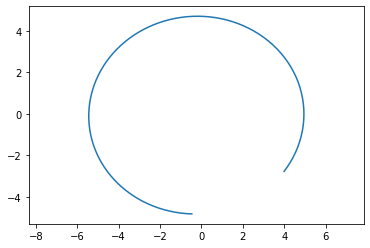

In [40]:
pp.plot(jarray[:,0], jarray[:,1])
pp.axis('equal')

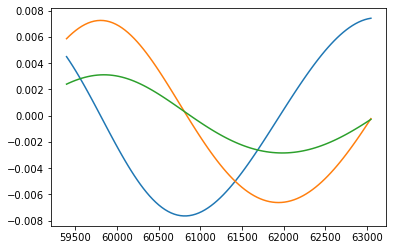

In [41]:
for i in range(3,6):
    pp.plot(ts.value, jarray[:,i])